# Data Mining Practice Project

#### This project was written by:
- Kyrsti Fitts
- Shivani Merchant
- Kevin Reynolds
- Ryan Espejo

<br><br><br>
##### Step 1: Load the data
- For the first step of this project, we will load the data from the data files.
- The data will be loaded into a pandas data frame.
- The data frame will be the data structure that holds our data.
- Add attribute name rows for the data

In [220]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Load the data (replace with the actual paths to your data files) and create attribute name row
attribute_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']
training_data = pd.read_csv('adult/training_data.csv', names = attribute_names)
test_data = pd.read_csv('adult/test_data.csv', names=attribute_names)

# Print number of rows and colums
training_rows_length, training_columns_length = training_data.shape
test_rows_length, test_columns_length = test_data.shape


print(f"Training Data Set: Read in {training_rows_length} rows and {training_columns_length} columns")
print(f"Test Data Set: Read in {test_rows_length} rows and {test_columns_length} columns")

Training Data Set: Read in 32561 rows and 15 columns
Test Data Set: Read in 16281 rows and 15 columns


<br><br>
##### Step 2: Remove rows containing unknown data
- Replace '?' characters with pandas 'NA' objects.
- Use the "dropna()" method to remove the rows.

In [221]:
# Remove records with unknown "?" values
training_data = training_data.replace(' ?', pd.NA)
training_data = training_data.dropna()

test_data = test_data.replace(' ?', pd.NA)
test_data = test_data.dropna()

# Remove period from income in the test data
test_data = test_data.replace(' <=50K.', ' <=50K')
test_data = test_data.replace(' >50K.', ' >50K')

print(test_data['class'])

# Display results
print(f"Training Data Set: Removed {training_rows_length - training_data.shape[0]} rows containing unknown values")
print(f"Test Data Set: Removed {test_rows_length - test_data.shape[0]} rows containing unknown values")

0         <=50K
1         <=50K
2          >50K
3          >50K
5         <=50K
          ...  
16275     <=50K
16276     <=50K
16278     <=50K
16279     <=50K
16280      >50K
Name: class, Length: 15060, dtype: object
Training Data Set: Removed 2399 rows containing unknown values
Test Data Set: Removed 1221 rows containing unknown values


Step 3: Remove All Continuous Attributes
- Continuous Attrbutes: age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week
- Drop these attributes from both pandas data frames

In [222]:
print("Training dataset columns before continuous attribute deletion")
print(training_data.columns)
print("Test dataset columns before continuous attribute deletion")
print(test_data.columns)

training_data.drop('age',inplace = True, axis=1)
training_data.drop('fnlwgt',inplace = True, axis=1)
training_data.drop('education-num',inplace = True, axis=1)
training_data.drop('capital-gain',inplace = True, axis=1)
training_data.drop('capital-loss',inplace = True, axis=1)
training_data.drop('hours-per-week',inplace = True, axis=1)

test_data.drop('age',inplace = True, axis=1)
test_data.drop('fnlwgt',inplace = True, axis=1)
test_data.drop('education-num',inplace = True, axis=1)
test_data.drop('capital-gain',inplace = True, axis=1)
test_data.drop('capital-loss',inplace = True, axis=1)
test_data.drop('hours-per-week',inplace = True, axis=1)

print("Training dataset columns after continuous atribute deletion")
print(training_data.columns)
print("Test dataset columns after continuous atribute deletion")
print(test_data.columns)


Training dataset columns before continuous attribute deletion
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')
Test dataset columns before continuous attribute deletion
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')
Training dataset columns after continuous atribute deletion
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'class'],
      dtype='object')
Test dataset columns after continuous atribute deletion
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'nativ

Step 4: Use one-hot encoding to transform data on each multi-domain categorial attribute
- Using scikit-learn to one-hot encode all the categorical data into numerical data so that it can be used in the algorithms for the next steps
- doing this on the training data

In [223]:
# One hot encoding on the training and test data
training_data = pd.get_dummies(training_data)
test_data = pd.get_dummies(test_data)

# Printing new data head with encoded categorical data
print("Training Data:")
print(training_data.head())

Training Data:
   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                   False                 False               False   
1                   False                 False               False   
2                   False                 False                True   
3                   False                 False                True   
4                   False                 False                True   

   workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  workclass_ State-gov  \
0                    False                        False                  True   
1                    False                         True                 False   
2                    False                        False                 False   
3                    False                        False                 False   
4                    False                        False                 False   

   workclass_ Without-pay  education_ 10th  education_ 11th  education_

<br><br>
##### Step 3: Build a decision tree classifier
- Separate the targets (income) into two separate dataframes
- X_train = all columns except income
- Y_train = only the income columns
- Create and fit the decision tree classifier
- Print a classification report
- Print a confusion matrix

              precision    recall  f1-score   support

class_ <=50K       0.86      0.90      0.88     11360
 class_ >50K       0.63      0.53      0.58      3700

    accuracy                           0.81     15060
   macro avg       0.74      0.72      0.73     15060
weighted avg       0.80      0.81      0.80     15060

Confusion Matrix:
[[10220  1140]
 [ 1729  1971]]

10220 -> Accurately predicted income >50K
1971 -> Accurately predicted income <=50K
1729 -> Incorrectly predicted income to be >50K when it was actually <=50K
1140 -> Incorrectly predicted income to be <=50K when is was actually >50k


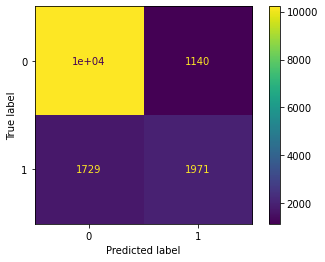

In [224]:
# Separate the target variables in training_data
X_train = training_data.drop(columns=["class_ <=50K", "class_ >50K"])
y_train = training_data[["class_ <=50K", "class_ >50K"]]

# Separate the target variables in test_data
X_test = test_data.drop(columns=["class_ <=50K", "class_ >50K"])
y_test = test_data[["class_ <=50K", "class_ >50K"]].idxmax(axis=1)
X_test['native-country_ Holand-Netherlands'] = 0 # Add missing column

warnings.filterwarnings('ignore') # Ignore deprecation warnings

# Create a decision tree classifier and fit it to the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict the targets of the test data
y_test_prediction = clf.predict(X_test)

# Get the index of the maximum value in each row to get the predicted class labels
y_test_prediction = pd.DataFrame(y_test_prediction, columns=["class_ <=50K", "class_ >50K"]).idxmax(axis=1)

# Print classification report
print(classification_report(y_test, y_test_prediction))

# Create confusion matrix
cm = confusion_matrix(y_test, y_test_prediction, labels=y_test.unique())

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

print("\n" + str(cm[0][0])+ " -> Accurately predicted income >50K")
print(str(cm[1][1]) + " -> Accurately predicted income <=50K")
print(str(cm[1][0]) + " -> Incorrectly predicted income to be >50K when it was actually <=50K")
print(str(cm[0][1]) + " -> Incorrectly predicted income to be <=50K when is was actually >50k")

# More fancy way of displaying the matrix graphically
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()